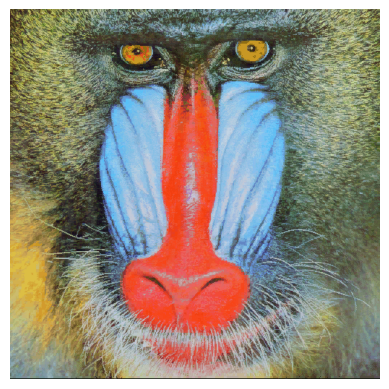

(512, 512, 3)


In [9]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
image_path = "./mandrill.png"

# download image if not exists
if not os.path.isfile(image_path):
    with open(image_path, 'wb') as f:
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
        resp = requests.get("https://upload.wikimedia.org/wikipedia/commons/a/ab/Mandrill-k-means.png", headers=headers)
        assert resp.ok, resp.status_code
        f.write(resp.content)

# read in image
img = imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [10]:
# convert image to 2d array by reshaping away the 3rd dimension
# Similar to the lecture,
# we treat each row as a feature, and each column as a sample
X = img.reshape(img.shape[0], -1)
print(X.shape)

(512, 1536)


In [11]:
# Perform SVD on the 2d array
U, s, VT = np.linalg.svd(np.cov(X, bias=True))
print("s shape:", s.shape)

s shape: (512,)


In [12]:
def explained_variance(s, k):
    ''' returns the explained variance when we keep the first k cols '''
    return sum(s[:k]) / sum(s)

k = 9
var = explained_variance(s, k)
print("        k selected:", k)
print("explained variance:", var)

        k selected: 9
explained variance: 0.7458919168744934


In [13]:
Ur = U[:,:k]
Z  = Ur.T @ X
print("Ur shape:", Ur.shape)
print(" Z shape:", Z.shape)

Ur shape: (512, 9)
 Z shape: (9, 1536)


In [14]:
def loss(X, X_approx):
    numer = np.square(np.subtract(X, X_approx)).sum()
    denom = np.square(X).sum()
    return (numer / denom)

def space_used(k):
    return (512*k + k*1536) / (512 * 1536)

X_approx = Ur @ Z
print("original arr shape:", X.shape)
print("  approx arr shape:", X_approx.shape)
print("              loss:", loss(X, X_approx))
print("        space used:", space_used(k))

original arr shape: (512, 1536)
  approx arr shape: (512, 1536)
              loss: 0.0615187168572872
        space used: 0.0234375


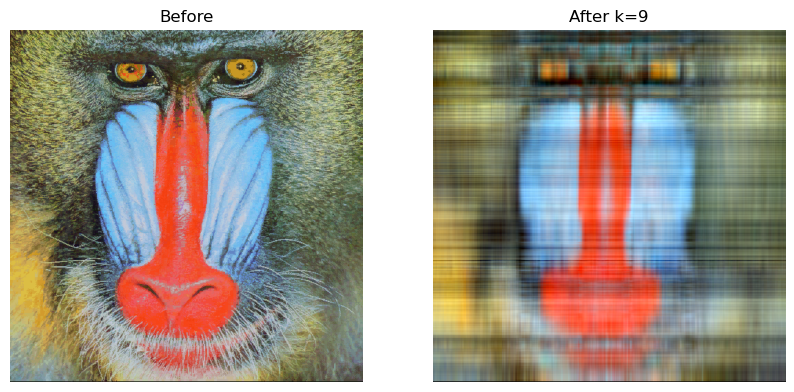

In [15]:
# reset the original image dimensions
img_approx = X_approx.reshape(*img.shape)
# clip values in case approximation exceeds bounds
img_approx = np.clip(img_approx, 0, 1)

# plot side-by-side
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,2,1)
plt.imshow(img)
ax.set_title("Before")
ax.axis("off")

ax = fig.add_subplot(1,2,2)
plt.imshow(img_approx)
ax.set_title(f"After k={k}")
ax.axis("off")

plt.show()

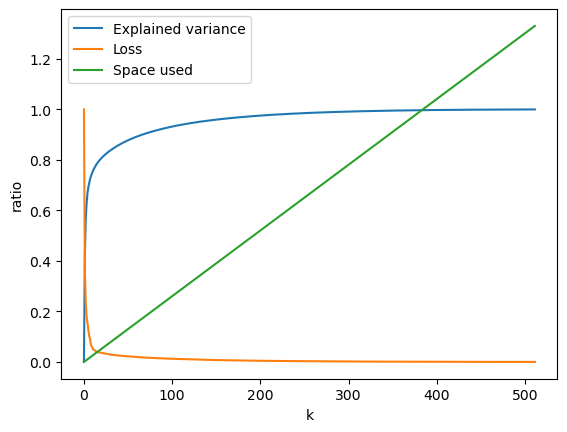

In [16]:
plt.plot(np.arange(512), [explained_variance(s, k) for k in range(512)], label='Explained variance')
plt.plot(np.arange(512), [loss(X, U[:,:k] @ (U[:,:k]).T @ X) for k in range(512)], label='Loss')
plt.plot(np.arange(512), [space_used(k) for k in range(512)], label='Space used')
plt.xlabel('k')
plt.ylabel('ratio')
plt.legend()